In [1]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

f

In [2]:
# Read Data
df = pd.read_csv('training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1',header=None)
df.head()
df.columns = ['label', 'id', 'date', 'query', 'user', 'tweet']

# Data reduction
df = df.drop(['id', 'date', 'query', 'user'], axis=1)

## Feature Engineering

In [3]:
columns=df.columns
columns

Index(['label', 'tweet'], dtype='object')

In [4]:
# df.drop([1,2,3,4],axis=1,inplace=True)
df.head()

,label,tweet
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [5]:
labels_dict = {0:'Negative', 2:'Neutral', 4:'Positive'}
# df.columns=['sentiment','data']
# df.head()

def convert_labels(label):
    return labels_dict[label]

df.label = df.label.apply(lambda x: convert_labels(x))
df

,label,tweet
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


Text(0.5, 1.0, 'Data Distribution')

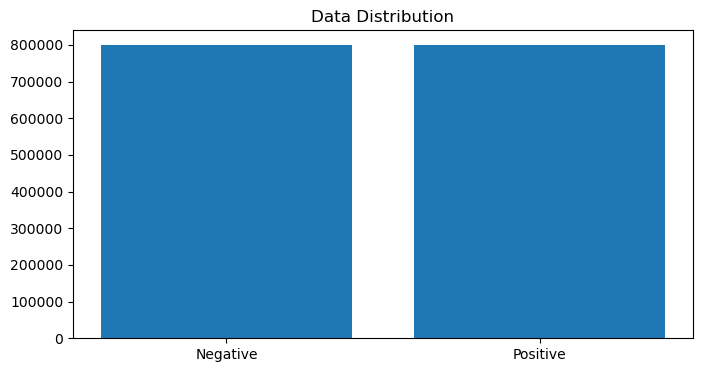

In [6]:
instances = df.label.value_counts()

plt.figure(figsize=(8,4))
plt.bar(instances.index, instances.values)
plt.title("Data Distribution")

In [7]:
y=df['label']

In [8]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

punctuations_and_dummies = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"



def preprocess(tweet, will_be_stemmed=False):
        tweet = re.sub(punctuations_and_dummies, ' ', str(tweet).lower()).strip()
        tokens = []
        for token in tweet.split():
            if token not in stop_words:
                if will_be_stemmed:
                    tokens.append(stemmer.stem(token))
                else:
                    tokens.append(token)
        return " ".join(tokens)

df.tweet = df.tweet.apply(lambda tw: preprocess(tw))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faysa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
# Remove 0 length tweets
df = df[df.iloc[:,1].astype(str).str.len()!=0]

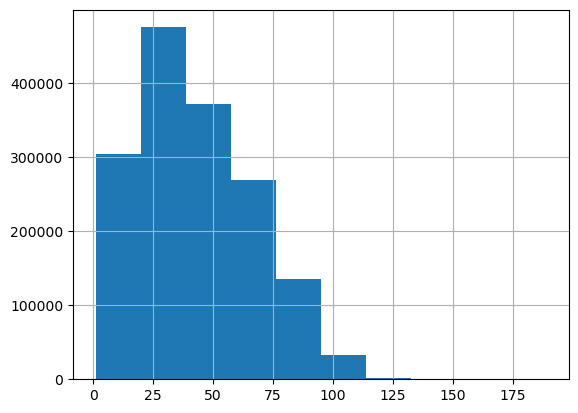

count    1.592328e+06
mean     4.279740e+01
std      2.415896e+01
min      1.000000e+00
25%      2.300000e+01
50%      3.900000e+01
75%      6.000000e+01
max      1.890000e+02
dtype: float64

In [10]:
tweets_len = [len(x) for x in df['tweet']]
pd.Series(tweets_len).hist()
plt.show()
pd.Series(tweets_len).describe()

In [11]:
all_str = ""
for i in df.tweet:
    all_str += i

In [12]:
from collections import Counter

letter_list = list(all_str)
my_counter = Counter(letter_list)

letter_df = pd.DataFrame.from_dict(my_counter, orient='index').reset_index()
letter_df = letter_df.rename(columns={'index':'letter', 0:'frequency'})
letter_df = letter_df.loc[letter_df['letter'].isin(['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z'])]
letter_df['all_tweets_relative_freq']=letter_df['frequency']/letter_df['frequency'].sum()
letter_df = letter_df.sort_values('letter')

english = pd.read_csv('letter_frequency_en_US.csv')
english['expected_relative_frequency'] = english['count']/english['count'].sum()
english = english.drop(['count'], axis=1)

letter_df = pd.merge(letter_df, english, on='letter')
letter_df['expected'] = np.round(letter_df['expected_relative_frequency']*letter_df['frequency'].sum(),0)
letter_df = letter_df.reset_index().drop(['index'], axis=1)
letter_df

,letter,frequency,all_tweets_relative_freq,expected_relative_frequency,expected
0,a,4547601,0.078816,0.081671,4712330.0
1,b,975326,0.016904,0.014920,860879.0
2,c,1705409,0.029557,0.027820,1605204.0
3,d,2289515,0.039680,0.042530,2453966.0
4,e,6471295,0.112156,0.127021,7329010.0
5,f,878849,0.015232,0.022280,1285548.0
6,g,2231747,0.038679,0.020150,1162648.0
7,h,2234047,0.038719,0.060941,3516217.0
8,i,3779579,0.065505,0.069661,4019358.0
9,j,143817,0.002493,0.001530,88280.0


<Axes: ylabel='letter'>

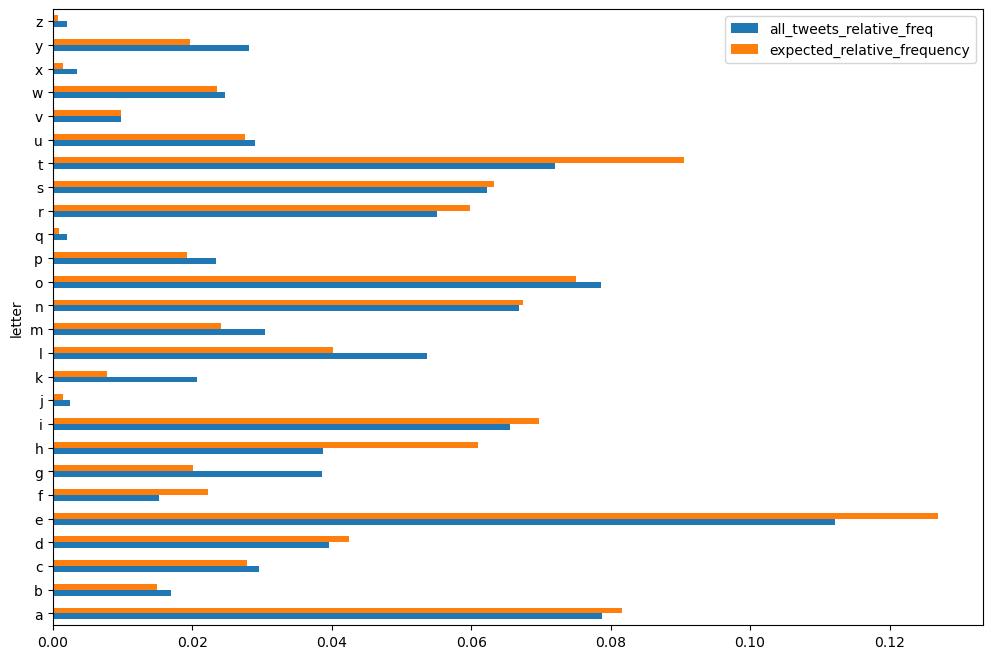

In [13]:
letter_df.plot(x="letter", y=["all_tweets_relative_freq", "expected_relative_frequency"], kind="barh", figsize=(12,8))

In [14]:
from scipy.stats import chi2_contingency
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(letter_df[['frequency', 'expected']])
p

0.0

In [15]:
letter_df[['frequency', 'expected']].corr()

,frequency,expected
frequency,1.000000,0.966795
expected,0.966795,1.000000


In [16]:
df1 = df.copy()

df1['number_of_characters'] = [len(tw) for tw in df1.tweet]
df1

,label,tweet,number_of_characters
0,Negative,awww bummer shoulda got david carr third day,44
1,Negative,upset update facebook texting might cry result...,69
2,Negative,dived many times ball managed save 50 rest go ...,52
3,Negative,whole body feels itchy like fire,32
4,Negative,behaving mad see,16
...,...,...,...
1599995,Positive,woke school best feeling ever,29
1599996,Positive,thewdb com cool hear old walt interviews,40
1599997,Positive,ready mojo makeover ask details,31
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,52


In [17]:
df1.number_of_characters.max()

189

In [18]:
df1.number_of_characters.min()

1

In [19]:
df1.number_of_characters.mean()

42.7974010379771

In [20]:
df1.number_of_characters.std()

24.15896165070398

In [21]:
df1['number_of_words'] = [len(tw.split()) for tw in df1.tweet]
df1

,label,tweet,number_of_characters,number_of_words
0,Negative,awww bummer shoulda got david carr third day,44,8
1,Negative,upset update facebook texting might cry result...,69,11
2,Negative,dived many times ball managed save 50 rest go ...,52,10
3,Negative,whole body feels itchy like fire,32,6
4,Negative,behaving mad see,16,3
...,...,...,...,...
1599995,Positive,woke school best feeling ever,29,5
1599996,Positive,thewdb com cool hear old walt interviews,40,7
1599997,Positive,ready mojo makeover ask details,31,5
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,52,9


In [22]:
df1.number_of_words.max()

50

In [23]:
df1.number_of_words.min()

1

In [24]:
df1.number_of_words.mean()

7.244474128445898

In [25]:
df1.number_of_words.std()

4.030421805717334

<BarContainer object of 20 artists>

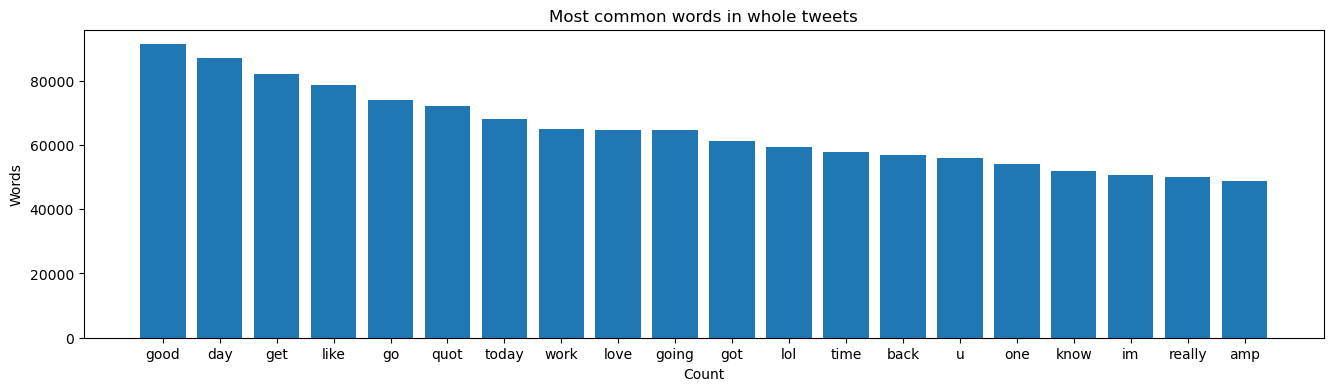

In [26]:
import collections
from wordcloud import WordCloud
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

all_tweets = ' '.join(df['tweet'].str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

plt.figure(figsize = (16, 4))
plt.title('Most common words in whole tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

<BarContainer object of 20 artists>

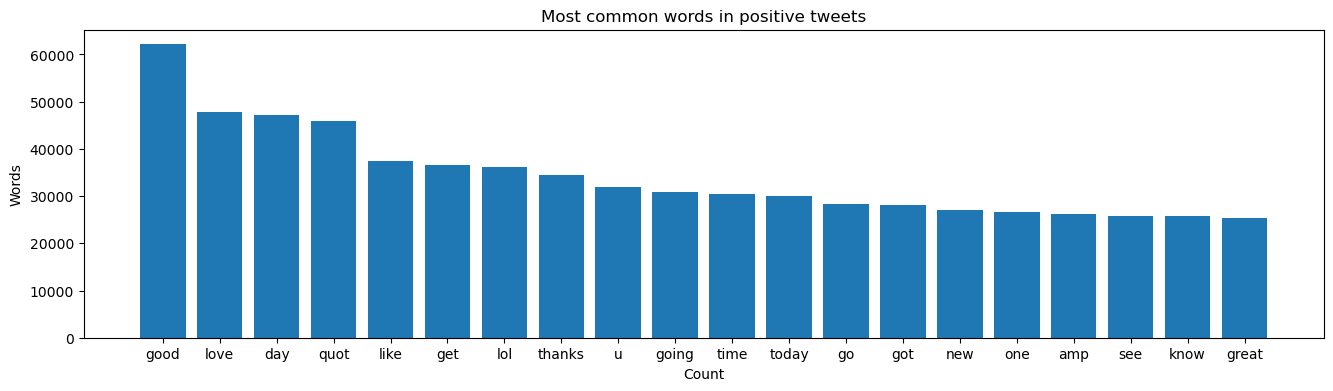

In [27]:
all_tweets = ' '.join(df[df.label == 'Positive'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

plt.figure(figsize = (16, 4))
plt.title('Most common words in positive tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

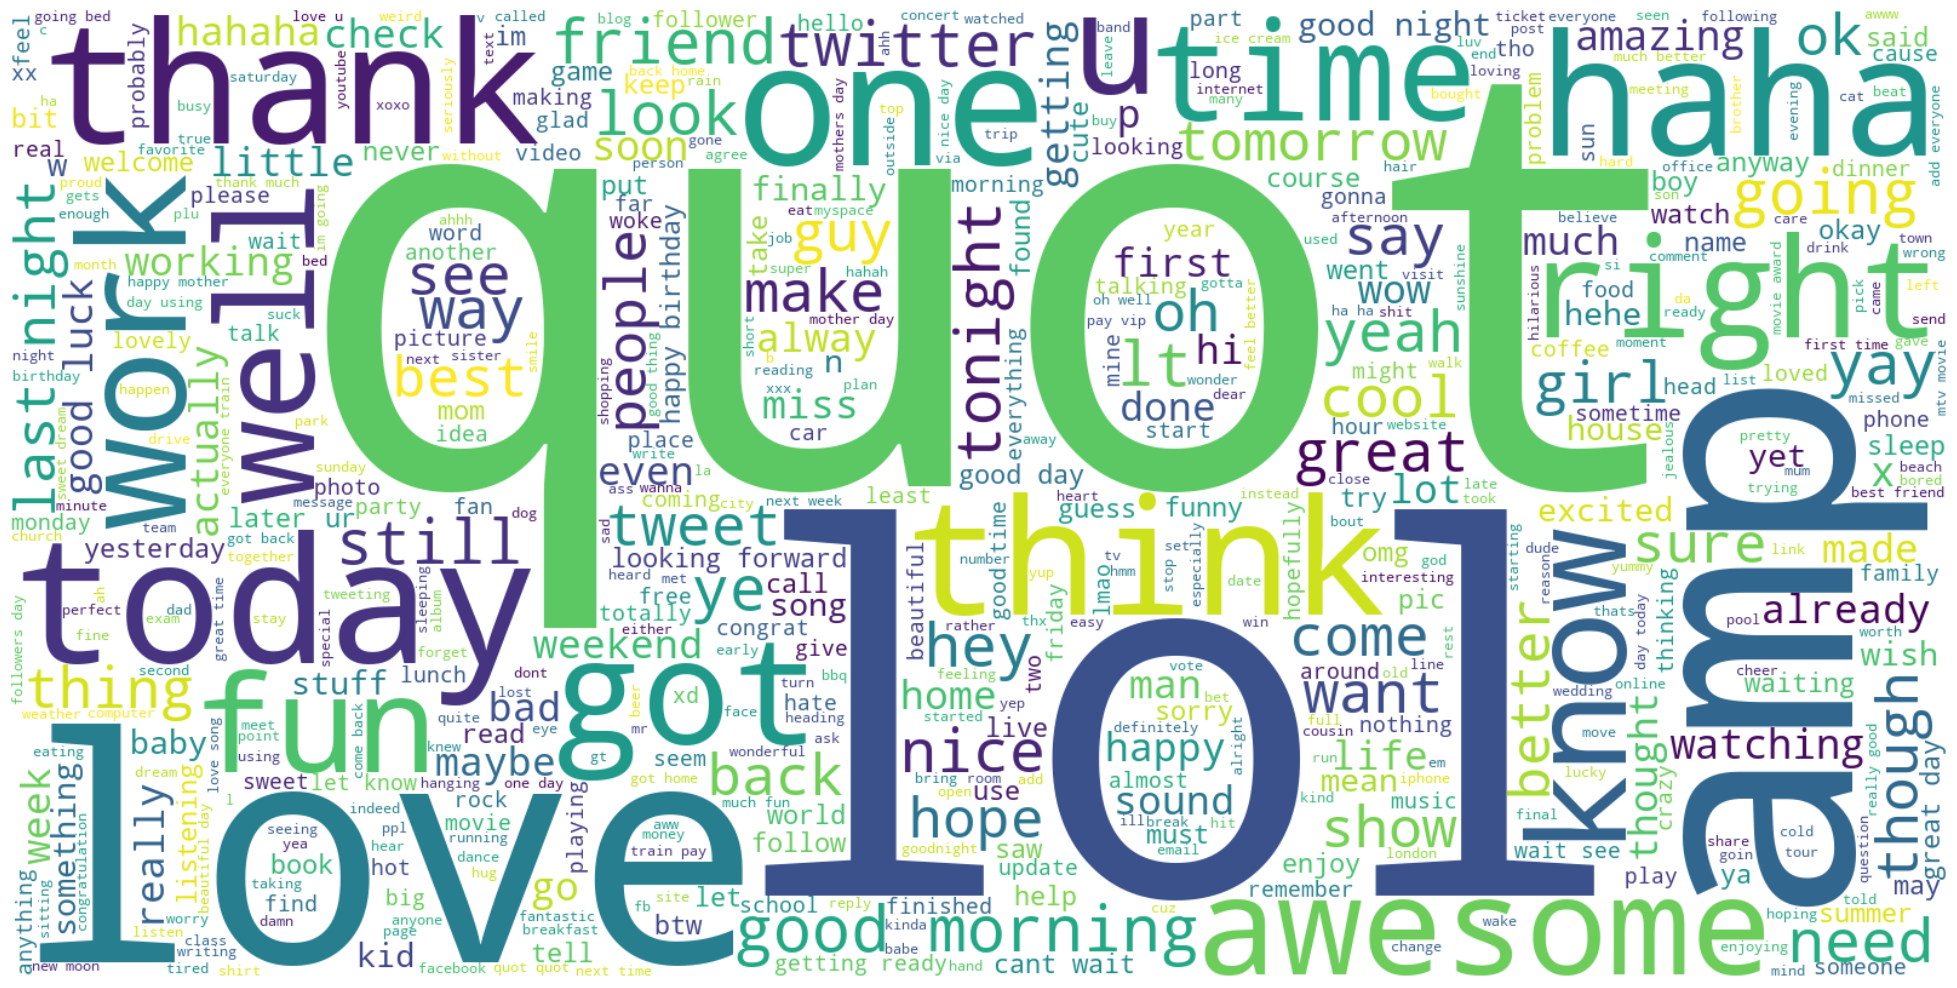

In [28]:
plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Positive'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

<BarContainer object of 20 artists>

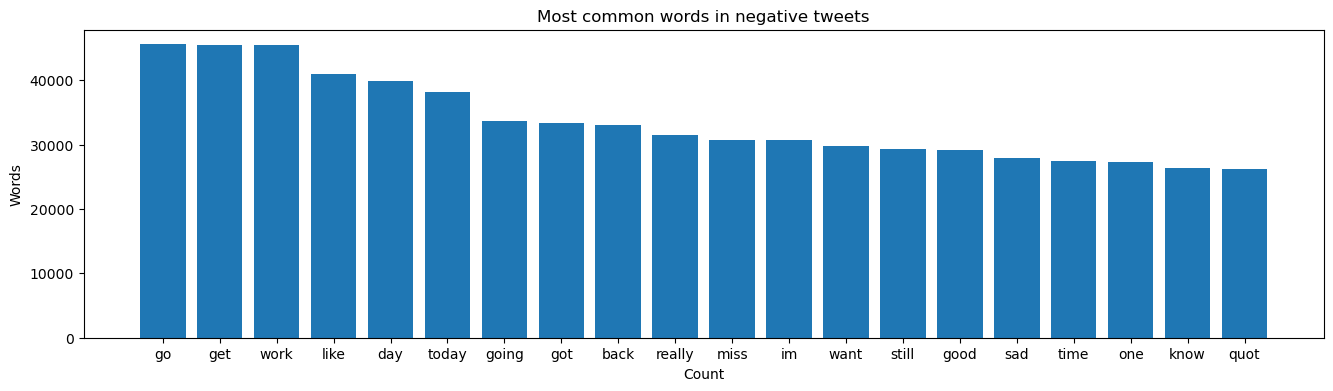

In [29]:
all_tweets = ' '.join(df[df.label == 'Negative'].tweet.str.lower())

f_words = [word for word in all_tweets.split()]
counted_words = collections.Counter(f_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)

plt.figure(figsize = (16, 4))
plt.title('Most common words in negative tweets')
plt.xlabel('Count')
plt.ylabel('Words')
plt.bar(words, counts)

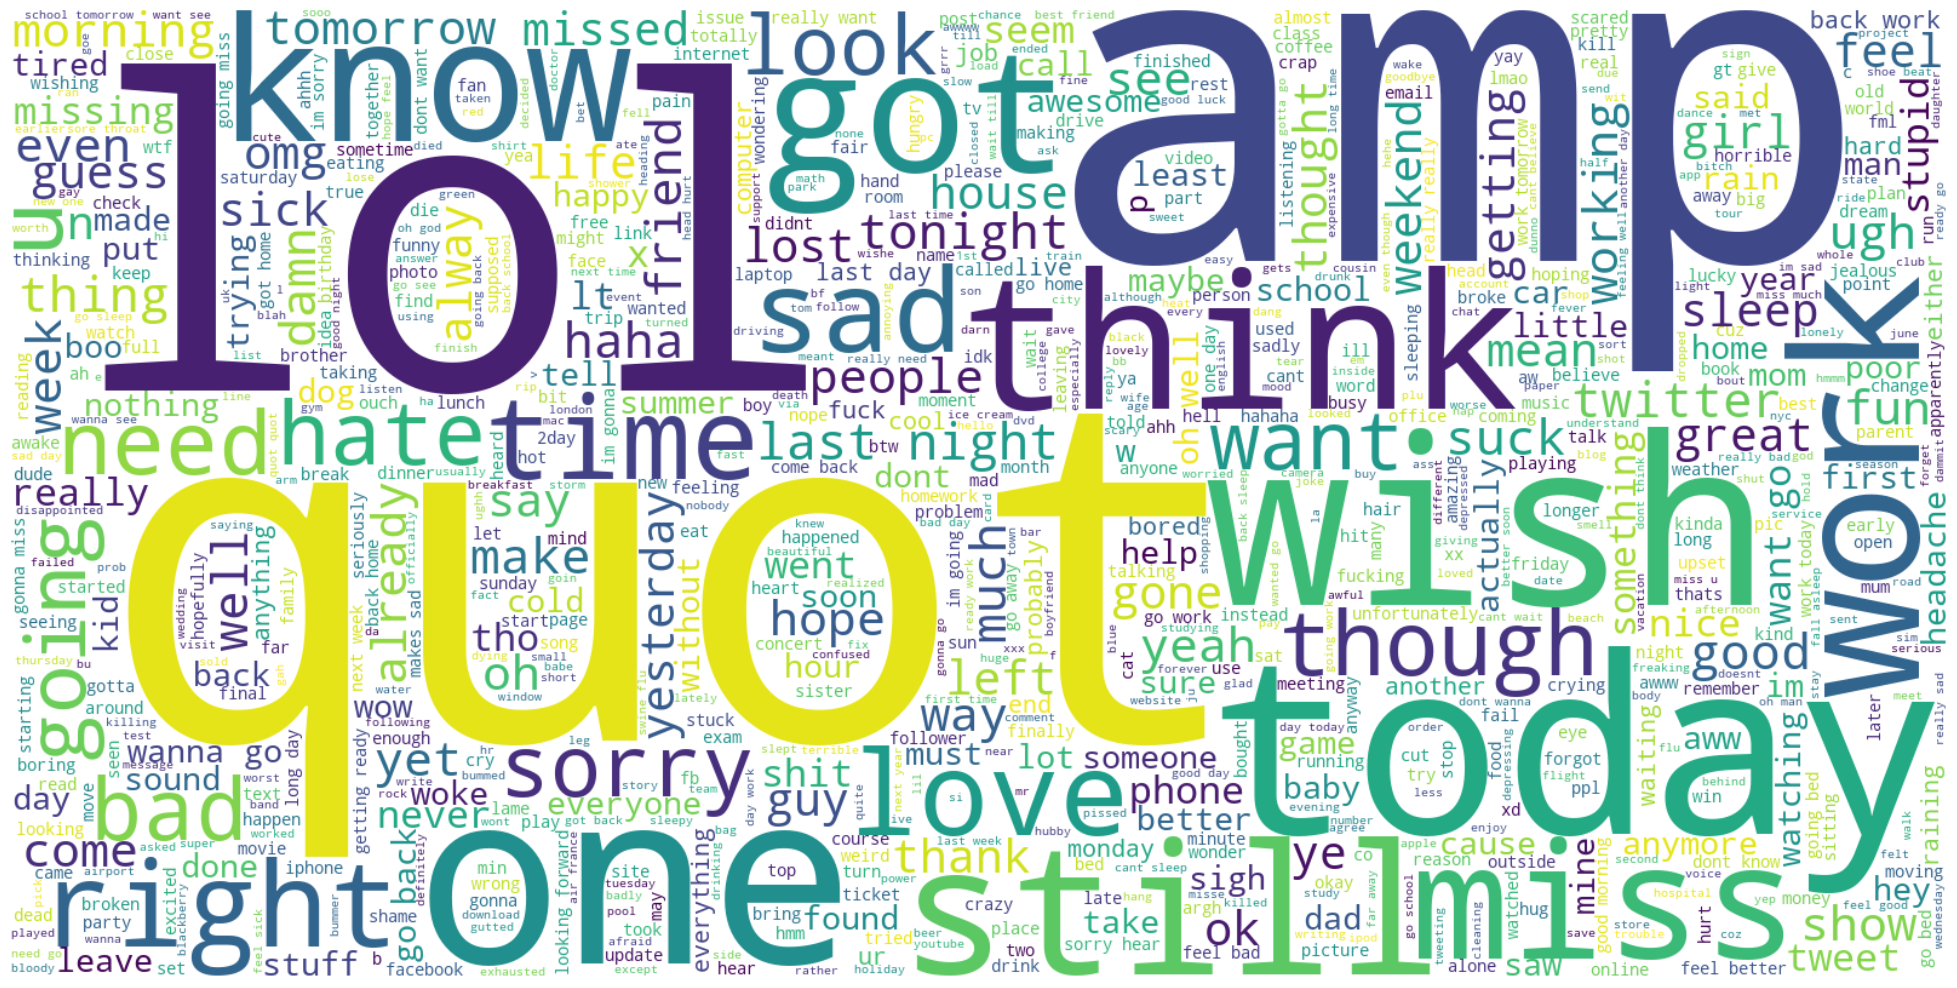

In [30]:
from wordcloud import WordCloud

plt.figure(figsize = (25, 25))
plt.axis('off')
wordcloud_fig = WordCloud(max_words = 2000 , width = 1600 , height = 800, background_color ='white', min_font_size = 10).generate(" ".join(df[df.label == 'Negative'].tweet))
plt.imshow(wordcloud_fig, interpolation = 'bilinear')

Splitting the dataset in train and test split

In [31]:
print(len(df['tweet']))
print(len(y))

1592328
1600000


In [32]:
from sklearn.model_selection import train_test_split
y = y[:len(df['tweet'])]
df_train,df_test,y_train,y_test=train_test_split(df['tweet'],y,test_size=0.33,random_state=42)
print('DF Train Shape: ',df_train.shape)
print('DF Test Shape: ',df_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

DF Train Shape:  (1066859,)
DF Test Shape:  (525469,)
Y Train Shape:  (1066859,)
Y Test Shape:  (525469,)


In [33]:
# from sklearn.model_selection import train_test_split

# train_data, test_data = train_test_split(df, test_size=0.2, random_state=7)
# print('Training Data', len(train_data), 'Test Data', len(test_data))

# train_data.head(10)

## Building deep learn model

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
max_words=10000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(df_train)
sequence_train=tokenizer.texts_to_sequences(df_train)
sequence_test=tokenizer.texts_to_sequences(df_test)

In [35]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 258932 number of independent tokens


In [36]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
data_train=pad_sequences(sequence_train)
data_train.shape

(1066859, 48)

In [37]:
T=data_train.shape[1]
data_test=pad_sequences(sequence_test,maxlen=T)
data_test.shape

(525469, 48)

In [38]:
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model

In [39]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 48)]              0         
                                                                 
 embedding (Embedding)       (None, 48, 20)            5178660   
                                                                 
 conv1d (Conv1D)             (None, 46, 32)            1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 15, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 13, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 4, 64)            0         
 1D)                                                         

Training the model

In [40]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Fit the encoder on the training data and transform the training data
y_train = encoder.fit_transform(y_train)

# Transform the test data using the same encoder
y_test = encoder.transform(y_test)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
cnn_senti = model.fit(data_train, y_train, validation_data=(data_test, y_test), epochs=5, batch_size=100)


Epoch 1/5
10669/10669 [==============================] - 259s 24ms/step - loss: 0.6329 - accuracy: 0.6187 - val_loss: 0.6278 - val_accuracy: 0.6258
Epoch 2/5
10072/10669 [===========================>..] - ETA: 14s - loss: 0.5869 - accuracy: 0.6562

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [41]:
y_pred=model.predict(data_test)
y_pred

16421/16421 [==============================] - 23s 1ms/step


array([[5.60844660e-01, 4.39155430e-01, 9.44106571e-10, 8.53326243e-10,
        9.26973220e-10],
       [3.52376699e-01, 6.47623301e-01, 9.12427009e-11, 9.62139188e-11,
        1.01862976e-10],
       [4.79530543e-01, 5.20469010e-01, 1.31434362e-07, 1.31509708e-07,
        1.33236412e-07],
       ...,
       [4.79530603e-01, 5.20469069e-01, 1.31434376e-07, 1.31509722e-07,
        1.33236426e-07],
       [6.20731413e-01, 3.79268557e-01, 3.27811267e-09, 3.05135539e-09,
        3.24477623e-09],
       [5.47295392e-01, 4.52704579e-01, 2.30407622e-08, 2.22163568e-08,
        2.30150228e-08]], dtype=float32)

In [42]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

Scoring

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(50.722222222222214, 0.5, 'y_pred')

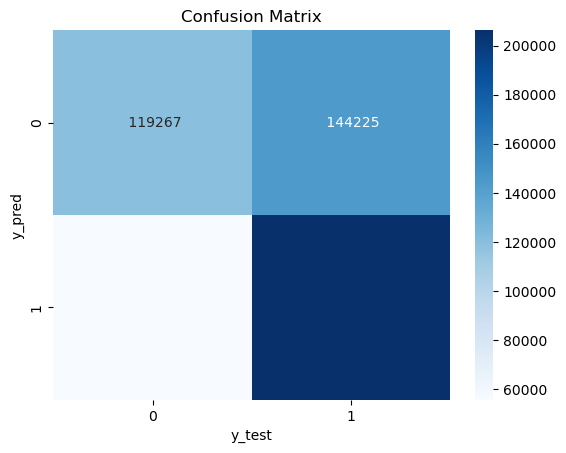

In [44]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.45      0.54    263492
           1       0.59      0.79      0.67    261977

    accuracy                           0.62    525469
   macro avg       0.64      0.62      0.61    525469
weighted avg       0.64      0.62      0.61    525469

